<a href="https://colab.research.google.com/github/Euchigere/Plate-Number-Classification/blob/master/Hngi6_ML_Plate_Number_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plate Number **Classification**

In [2]:
import os, cv2, itertools # cv2 -- OpenCV
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [5]:
os.listdir('My Drive')


['How to get started with Drive.pdf',
 'PROJECT SEMINAR PRESENTATION MAIN.pptx',
 'eklipse Registration form.docx',
 'Digital Skills for Africa Certification.pdf',
 'Social_Media_Content_Calendar.xlsx',
 'Ugochukwu.png',
 'The Power Of Social Media Book.pdf',
 '3 HCD_Workshop_Presentation_1.1.pdf',
 'Human-Centered Design At a Glance.pdf',
 'ds 160 form.doc',
 'Classroom',
 'Academy Tester Handbook.gslides',
 'Masters project',
 'GRE materials',
 'Document from Ugo Chigere',
 'data_ex.dta',
 'my_certificates',
 'Plate number',
 'Colab Notebooks',
 'hngi6']

In [0]:
#Import packages
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Image dirctory

plate_number_dir = '/gdrive/My Drive/hngi6/plate_number/' #'./plate_numbers/'
negative_image_dir = '/gdrive/My Drive/hngi6/negative_image/' #'./negative_images/'

In [0]:
#creating a list of paths for all the images

plate_number_paths = [os.path.join(plate_number_dir, i) for i in os.listdir(plate_number_dir)]
negative_image_paths = [os.path.join(negative_image_dir, i) for i in os.listdir(negative_image_dir)]

In [0]:
# A fuction to read the images in greyscale and resize them

rows = 64
cols = 64
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img, (rows, cols), interpolation=cv2.INTER_CUBIC)
    return resized_img


In [0]:
# A function to prepare the image

def prep_data(images):
    m = len(images)
    n_x = rows*cols
    X = np.ndarray((n_x, m), dtype=np.uint8)
    y = np.zeros((1, m))
    print("X.shape is {}".format(X.shape))
    print("y.shape is {}".format(y.shape))
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        X[:, i] = np.squeeze(image.reshape((n_x, 1)))
        
        if 'plate_number' in image_file.lower():
            y[0, i] = 1
            
        elif 'negative_image' in image_file.lower():
            y[0, i] = 0
            
        if i%100 == 0:
            print('Proceed {} of {}'.format(i, m))
            
    return X, y

In [15]:
# Calling prep_data function and using the train_test_split for train and test data

X_image, y_image = prep_data(plate_number_paths + negative_image_paths)

X_img_train, X_img_test, y_img_train, y_img_test = train_test_split(X_image.T, y_image.T, test_size=0.2, random_state=0, shuffle=True)

print('X_img_train.shape is {}'.format(X_img_train.shape))
print('X_img_test.shape is {}'.format(X_img_test.shape))
print('y_img_train.shape is {}'.format(y_img_train.shape))
print('y_img_test.shape is {}'.format(y_img_test.shape))

X.shape is (4096, 100)
y.shape is (1, 100)
Proceed 0 of 100
X_img_train.shape is (80, 4096)
X_img_test.shape is (20, 4096)
y_img_train.shape is (80, 1)
y_img_test.shape is (20, 1)


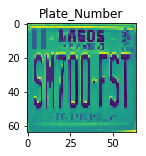

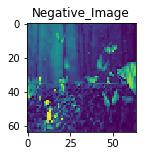

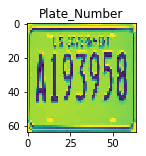

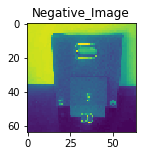

In [16]:
# function for displaying image give an index: idx

classes = {0: 'Negative_Image', 1: 'Plate_Number'}

def show_images(X, y, idx):
    image = X[idx]
    image = image.reshape((rows, cols))
    plt.figure(figsize=(4,2))
    plt.imshow(image)
    plt.title(classes[y[idx, 0]])
    plt.show()
    
for i in range(4):
    show_images(X_img_train, y_img_train, i)

In [17]:
# Build Models
# Logistic Regression Model

from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()
clf.fit(X_img_train, y_img_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
# function to visualize predictions and score for linear regression

def show_img_pred(X_test, y_test, idx, model):
    image = X_test[idx].reshape(1, -1)
    image_class = classes[model.predict(image).item()]
    image = image.reshape((rows, cols))
    plt.figure(figsize=(4, 2))
    plt.imshow(image)
    plt.title("Test {} : I think this is {}".format(idx, image_class))
    plt.show()
    print("Model accuracy: {:.2f}%".format(model.score(X_test, y_test)*100))


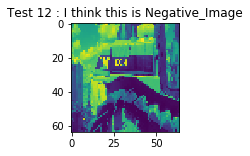

Model accuracy: 95.00%


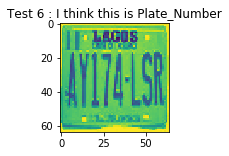

Model accuracy: 95.00%


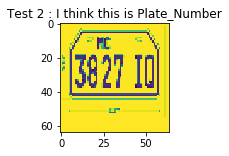

Model accuracy: 95.00%


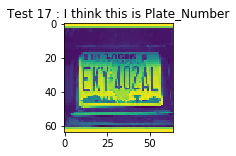

Model accuracy: 95.00%


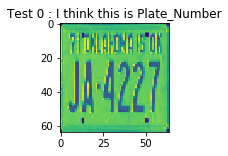

Model accuracy: 95.00%


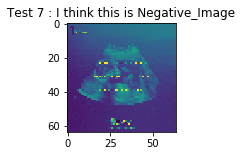

Model accuracy: 95.00%


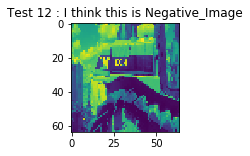

Model accuracy: 95.00%


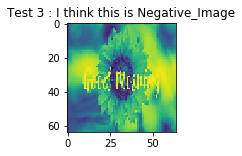

Model accuracy: 95.00%


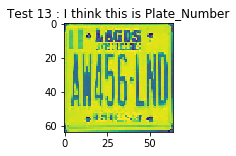

Model accuracy: 95.00%


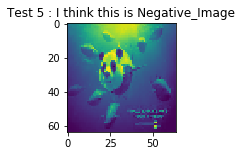

Model accuracy: 95.00%


In [19]:
for i in np.random.randint(0, len(X_img_test), 10):
    show_img_pred(X_img_test, y_img_test, i, clf)

In [0]:
#preprocessing for keras model
from tensorflow import keras

num_classes = 2
def prep_image(X, y):
    out_y = keras.utils.to_categorical(y, num_classes)
    num_images = X.shape[0]
    out_x = X.reshape(num_images, rows, cols, 1)
    out_x = out_x/255
    return out_x, out_y
X_img_keras, y_img_keras = prep_image(X_image.T, y_image.T)


In [39]:
# Keras Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D


model = Sequential()
model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(rows, cols, 1)))
model.add(Conv2D(10, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(X_img_keras, y_img_keras, batch_size=50, epochs=2, validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/2
80/80 [==============================] - 1s 8ms/sample - loss: 1.3997 - acc: 0.6250 - val_loss: 3.8888 - val_acc: 0.0000e+00
Epoch 2/2
80/80 [==============================] - 0s 4ms/sample - loss: 1.1817 - acc: 0.5250 - val_loss: 0.4274 - val_acc: 1.0000
